In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.model_selection import train_test_split as tts   # el alias es cosa
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../NBA_csv/StatsAllTrain.csv")

In [3]:
df.head()
import pandas as pd

df['PER'] = (df['PTS'] + (df['AST'] + df['TRB'] + df['STL'] + df['BLK'] - df['TOV']) / df['G']) / (df['MP'] / 48)

# Mostrar el DataFrame con la nueva columna PER


In [4]:
df=df.dropna()

In [5]:
df=df[df["Salario"]>=953000]

In [6]:
df.sort_values(by="PER", ascending = False)

,Salario,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
900,42492492,Giannis Antetokounmpo,AP,28,MIL,63,63,2024,707,1278,0.55,47,171,0.28,660,1107,0.60,0.57,498,772,0.65,137,605,742,359,52,51,246,197,1959,46.82
927,33616770,Joel Embiid,P,28,PHI,66,66,2284,728,1328,0.55,66,200,0.33,662,1128,0.59,0.57,661,771,0.86,113,557,670,274,66,112,226,205,2183,46.16
164,39344900,Giannis Antetokounmpo,AP,27,MIL,67,67,2204,689,1245,0.55,71,242,0.29,618,1003,0.62,0.58,553,766,0.72,134,644,778,388,72,91,219,212,2002,43.96
233,31579390,Joel Embiid,P,27,PHI,68,68,2297,666,1334,0.50,93,251,0.37,573,1083,0.53,0.53,654,803,0.81,146,650,796,284,77,99,214,181,2079,43.76
566,37096500,Luka Dončić,BA,23,DAL,66,66,2391,719,1449,0.50,185,541,0.34,534,908,0.59,0.56,515,694,0.74,54,515,569,529,90,33,236,166,2138,43.22
522,42492492,Damian Lillard,BA,32,POR,58,58,2107,556,1202,0.46,244,658,0.37,312,544,0.57,0.56,510,558,0.91,44,233,277,425,50,18,191,109,1866,42.74
595,30913750,Shai Gilgeous-Alexander,BA,24,OKC,68,68,2416,704,1381,0.51,58,168,0.34,646,1213,0.53,0.53,669,739,0.91,59,270,329,371,112,65,192,192,2135,42.62
640,48070014,Stephen Curry,BA,34,GSW,56,56,1941,559,1133,0.49,273,639,0.43,286,494,0.58,0.61,257,281,0.92,39,302,341,352,52,20,179,117,1648,41.01
190,9603360,Ja Morant,BA,22,MEM,57,57,1889,580,1177,0.49,88,256,0.34,492,921,0.53,0.53,316,415,0.76,77,248,325,384,66,22,196,86,1564,40.01
703,12119440,Ja Morant,BA,23,MEM,61,59,1948,566,1214,0.47,92,300,0.31,474,914,0.52,0.50,372,497,0.75,61,296,357,493,66,16,206,100,1596,39.62


In [7]:
#vamos a convertir las stadisticas a minutos para que sea todo mas equitativo
df['PTS'] = df['PTS'] / df['MP']
df['2P'] = df['2P'] / df["MP"]
df['2PA'] = df['2PA'] / df["MP"]
df['3P'] = df['3P'] / df['MP']
df['3PA'] = df['3PA'] / df['MP']
df['FG'] = df['FG'] / df['MP']
df['FGA'] = df['FGA'] / df['MP']
df['FT'] = df['FT'] / df['MP']
df['FTA'] = df['FTA'] / df['MP']
df['ORB'] = df['ORB'] / df['MP']
df['DRB'] = df['DRB'] / df['MP']
df['TRB'] = df['TRB'] / df['MP']
df['AST'] = df['AST'] / df['MP']
df['STL'] = df['STL'] / df['MP']
df['BLK'] = df['BLK'] / df['MP']
df['TOV'] = df['TOV'] / df['MP']
df['PF'] = df['PF'] / df['MP']

In [8]:
df_numericas = df.select_dtypes(include=['number'])
#df_numericas.drop(columns = ["STL","PF","BLK","TRB","eFG%","3P%","FG%","2P%","ORB"], inplace= True)

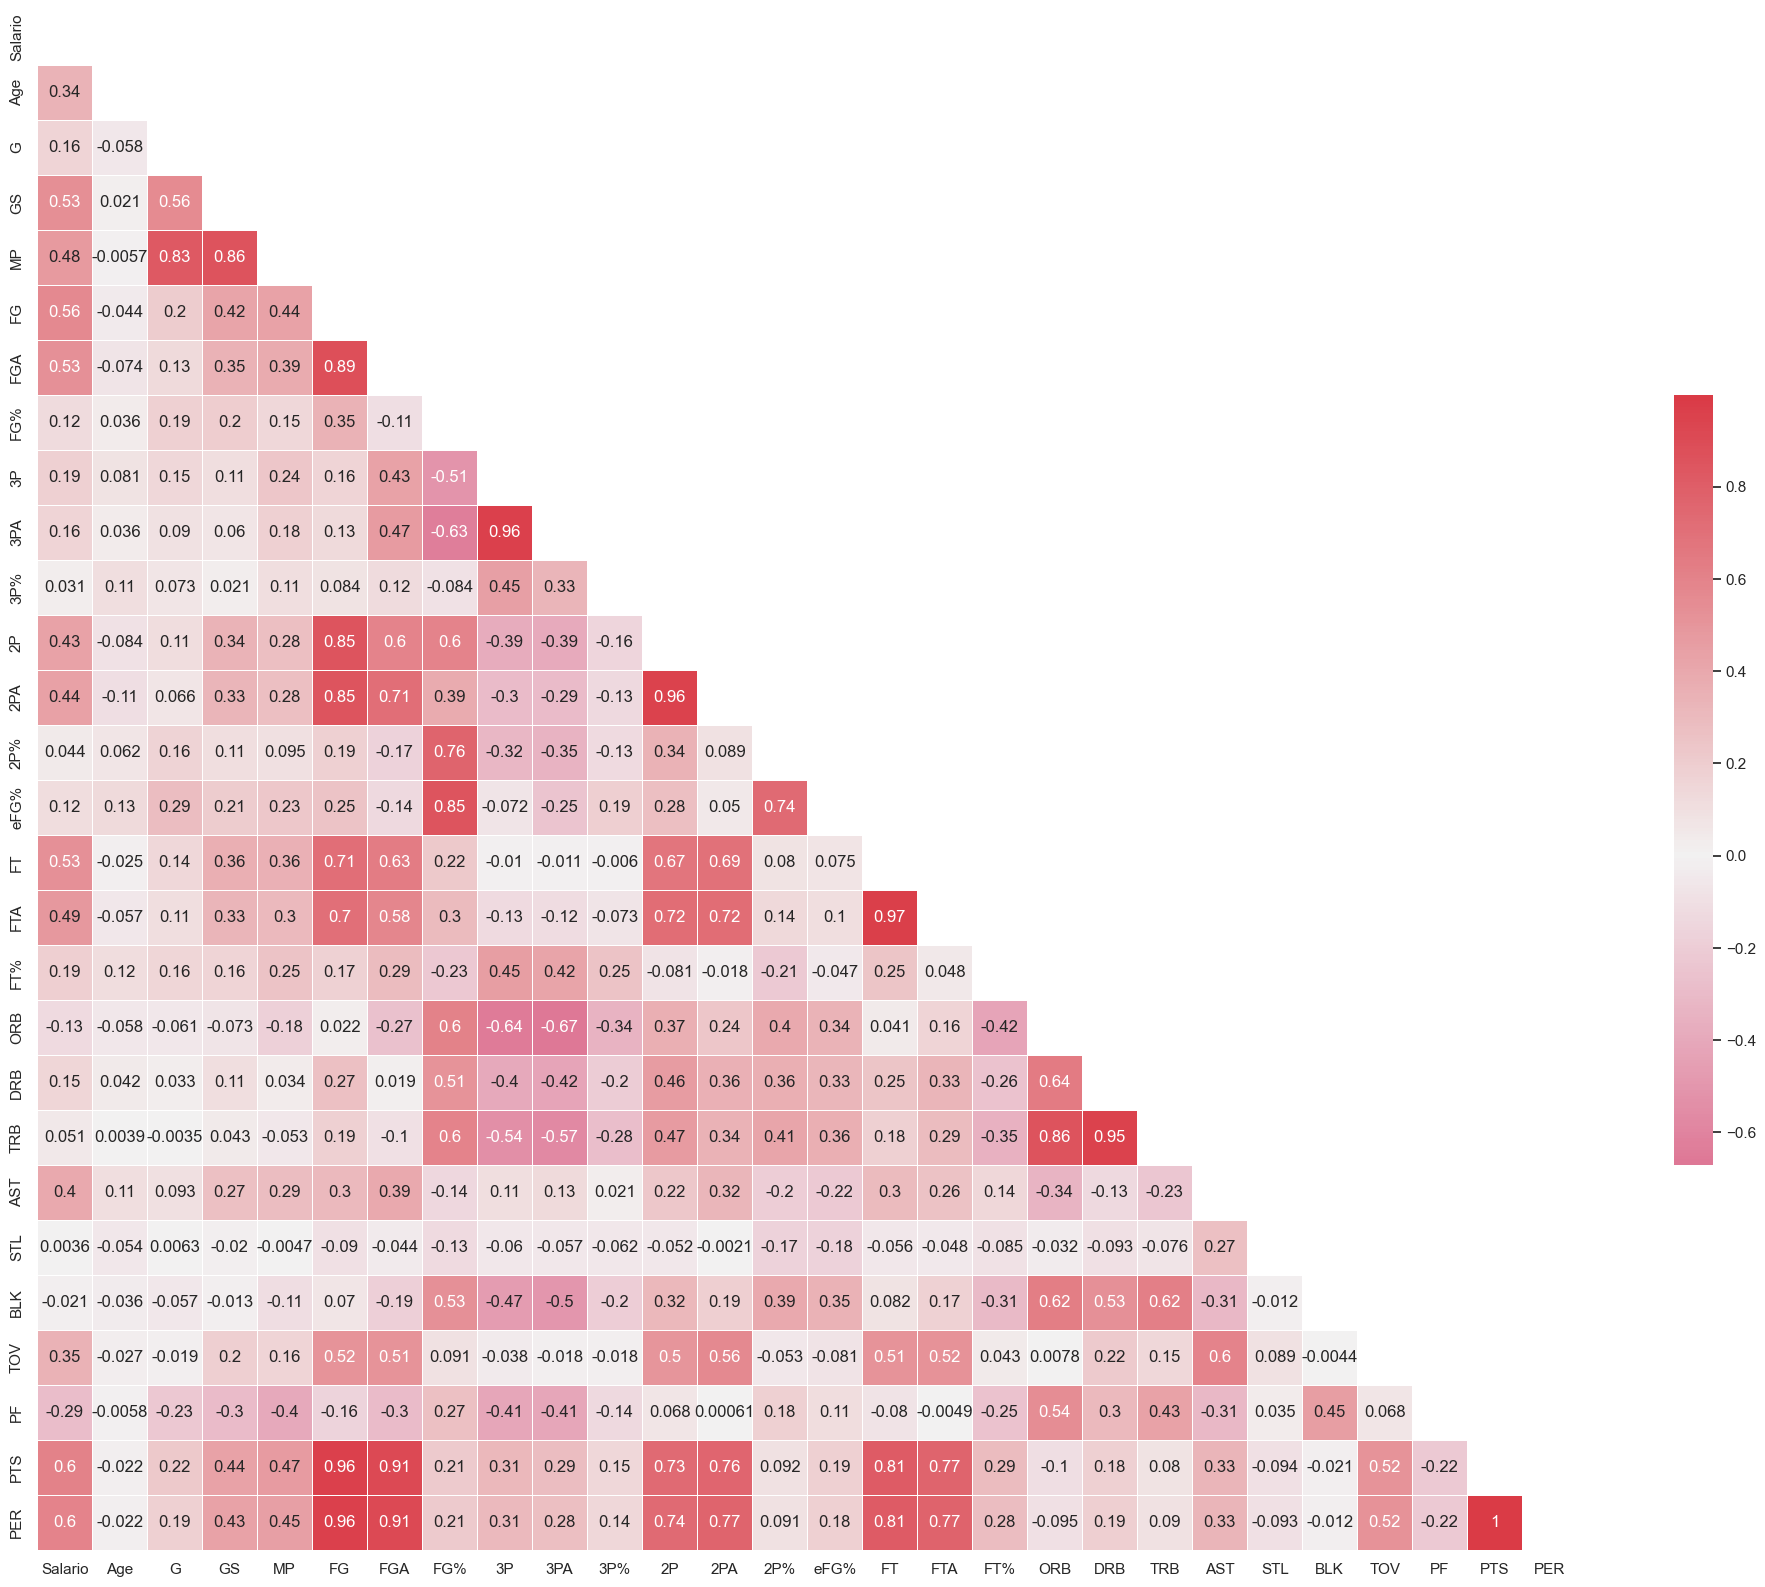

In [9]:
#tiramos un heatmap para ver la colinialidad de las Variables.

plt.figure(figsize=(25, 20))

sns.set(style='white')

mask=np.triu(np.ones_like(df_numericas.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_numericas.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [22]:
X = df_numericas.drop(["Salario"], axis = 1)
 
y = df_numericas.Salario

In [23]:
X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((649, 27), (163, 27), (649,), (163,))

In [24]:
from lazypredict.Supervised import LazyRegressor

#Split the data into training and testing sets (if not already split)

# Initialize Lazy Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# Fit and score all models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:07<00:00,  5.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5037
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 27
[LightGBM] [Info] Start training from score 9420755.537750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [13]:
#from sklearn.experimental import enable_hist_gradient_boosting  # noqa
#from sklearn.ensemble import HistGradientBoostingRegressor

#model = HistGradientBoostingRegressor()

#param_grid = {
#    'learning_rate': [0.01, 0.1, 0.2],
 #   'max_iter': [100, 200, 300],
 #   'max_leaf_nodes': [15, 31, 50],
 #   'max_depth': [None, 5, 10],
 #   'min_samples_leaf': [1, 5, 10],
 #   'l2_regularization': [0.0, 0.1, 0.2]
#}

# Configurar GridSearchCV con cross-validation (CV)
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
#grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y su rendimiento
#print("Mejores parámetros encontrados:")
#print(grid_search.best_params_)
#print("\nMejor rendimiento (MSE) en conjunto de entrenamiento:")
#print(-grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
#y_pred = grid_search.best_estimator_.predict(X_test)
#mse_test = mean_squared_error(y_test, y_pred)

#print("\nRendimiento (MSE) en conjunto de prueba:")

In [20]:
# Crear y entrenar el modelo ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [21]:
rmse_test = np.sqrt(mse_test)
rmse_test

5232318.1152787935

In [16]:
res = pd.DataFrame({"real": y_test, "pred":y_pred, "error millions": (y_pred-y_test)/1000000})

res

NameError: name 'y_pred' is not defined